FAISS index loaded from /nobackup/riyad/NAVICLUES/NaviClues/Navig/guidebook/index.index
Input is an image path, loading image...
Top 5 similar images:
/nobackup/riyad/NAVICLUES/data/guidebook/plonkit/downloaded_images/Albania_28.jpg


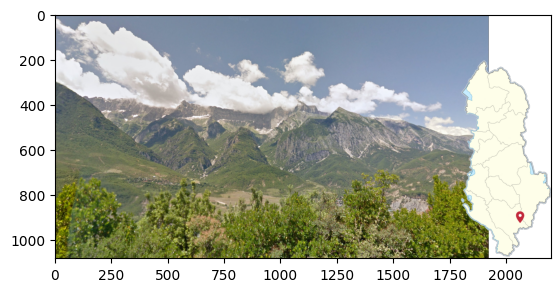

/nobackup/riyad/NAVICLUES/data/guidebook/plonkit/downloaded_images/Albania_26.jpg


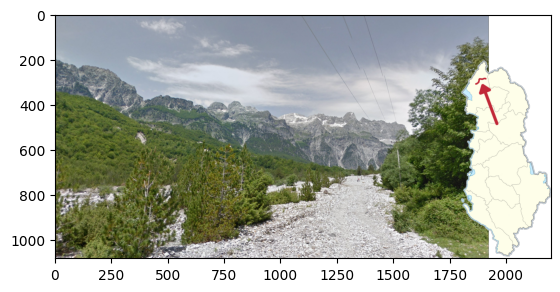

/nobackup/riyad/NAVICLUES/data/guidebook/plonkit/downloaded_images/Spain_46.jpg


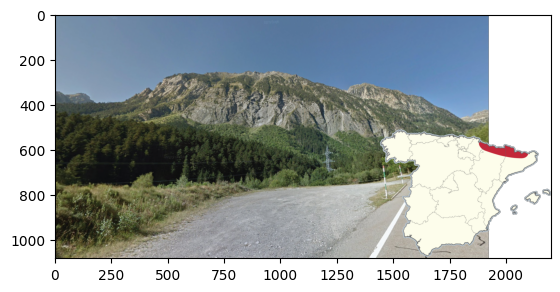

/nobackup/riyad/NAVICLUES/data/guidebook/plonkit/downloaded_images/Albania_27.jpg


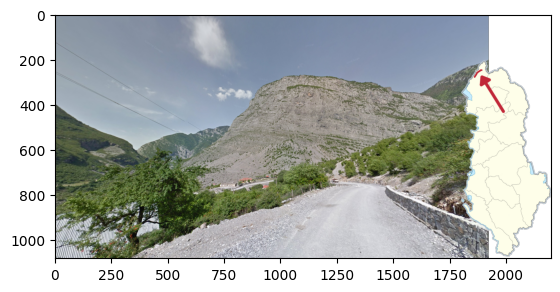

/nobackup/riyad/NAVICLUES/data/guidebook/plonkit/downloaded_images/Montenegro_18.jpg


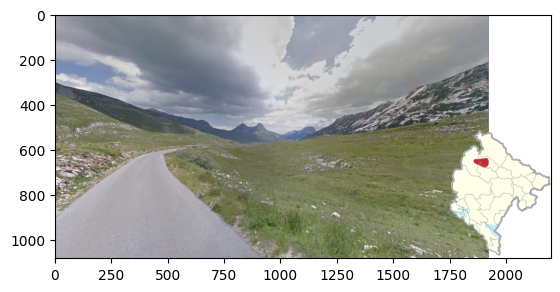

In [ ]:
import faiss
import os
import numpy as np
from PIL import Image
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt

def load_faiss_index(index_path):
    index = faiss.read_index(index_path)
    print(f"FAISS index loaded from {index_path}")
    with open(index_path + '.paths', 'r') as f:
        image_paths = [line.strip() for line in f.readlines()]
    
    return index, image_paths

def retrieve_similar_images(query,model, index, image_paths, top_k=5):
    if query.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print("Input is an image path, loading image...")
        image = Image.open(query)
    query_embedding = model.encode(image)
    query_vector = np.array([query_embedding]).astype(np.float32)
    distances, indices = index.search(query_vector, top_k)
    
    similar_images = []
    for idx in indices[0]:
        similar_images.append(image_paths[idx])
    
    return similar_images


    
model = SentenceTransformer('clip-ViT-B-32')
index_path = "/nobackup/riyad/NAVICLUES/NaviClues/Navig/guidebook/index.index"
index, image_paths = load_faiss_index(index_path)

query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/Albania_28.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

In [ ]:
query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/Albania_28.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)
    print(img_path)
    plt.show()

In [2]:
!pip install faiss-cpu sentence-transformers pillow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 6.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.0/488.0 KB 12.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB ? eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 2.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB ? eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 5.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 17.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 484.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 15.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.2 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


Input is an image path, loading image...
Top 5 similar images:


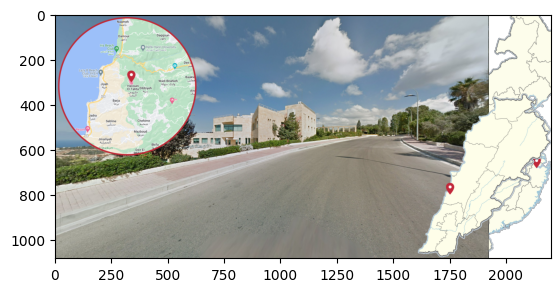

In [7]:
query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/uwmadison_img.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)

Input is an image path, loading image...
Top 5 similar images:


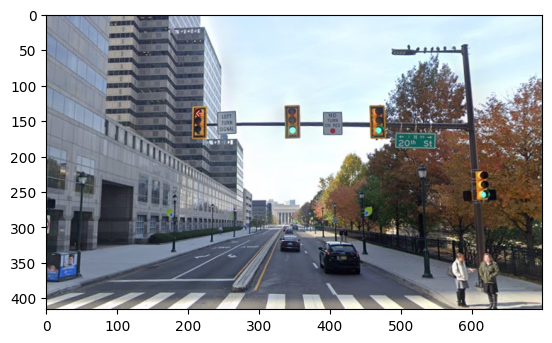

In [8]:
query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/mit_img.jpg"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)

Input is an image path, loading image...
Top 5 similar images:


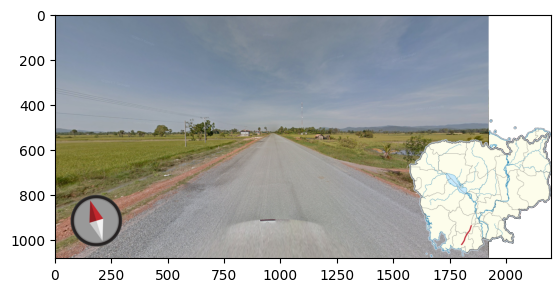

In [9]:
query_image_path = "/nobackup/riyad/NAVICLUES/data/sample_image/110.png"
similar_images = retrieve_similar_images(query_image_path, model, index, image_paths, top_k=5)
base_dir = "/nobackup/riyad/NAVICLUES/data"
print("Top 5 similar images:")
for img_path in similar_images:
    img_path = os.path.join(base_dir, img_path)
    img = Image.open(img_path)
    plt.imshow(img)